# Определение возраста покупателей

<img src="https://s3.amazonaws.com/thumbnails.illustrationsource.com/huge.0.3333.JPG" width="170" align="left"/>Сетевой супермаркет <b>«Хлеб-Соль»</b> внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:<br>

○ <i>Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;</i><br>
○ <i>Контролировать добросовестность кассиров при продаже алкоголя.</i><br>

Постройте модель, которая по фотографии определит приблизительный возраст человека. В вашем распоряжении набор фотографий людей с указанием возраста. Значения MAE на тестовой выборке должно быть не больше 8.

# Описание данных

Данные взяты с сайта <a href="http://chalearnlap.cvc.uab.es/dataset/26/description/">ChaLearn Looking at People</a>. Они находятся в папке `/datasets/faces/`.
В распоряжении одна папка со всеми изображениями `/datasets/faces/final_files` и CSV-файл `labels.csv` с двумя колонками: 
- `'file_name'`
- `'real_age'`.

## Исследовательский анализ данных.

### Импорт необходимых библиотек.

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import random

from PIL import Image

### Глобальные переменные и настройка окружения.

In [2]:
FILE_PATH = '/datasets/faces/labels.csv'
IMAGES_PATH = '/datasets/faces/final_files'

RANDOM_STATE = 42
TITLE_FONTSIZE = 12

random.seed(RANDOM_STATE)

### Загрузка, обзор и анализ выборки.

<b>Размер выборки и её основные характеристики.</b>

In [3]:
labels = pd.read_csv(FILE_PATH)

Общая информация о датафрейме.

In [4]:
print(labels.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB
None


Случайный пятистрочный контент датафрейма.

In [5]:
labels.sample(5)

,file_name,real_age
3469,003469.jpg,25
4793,004793.jpg,23
4633,004633.jpg,21
6115,006118.jpg,67
2842,002842.jpg,41


Описание датафрейма.

In [6]:
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


Наличие дубликатов в датафрейме.

In [7]:
print(f'Количество дубликатов: {labels.duplicated().sum()}')

Количество дубликатов: 0


Наличие полностью пустых строк в датафрейме.

In [8]:
print(f'Количество полностью пустых строк: {labels.isna().all(axis=1).sum()}')

Количество полностью пустых строк: 0


<b>График распределения возраста в выборке.</b>

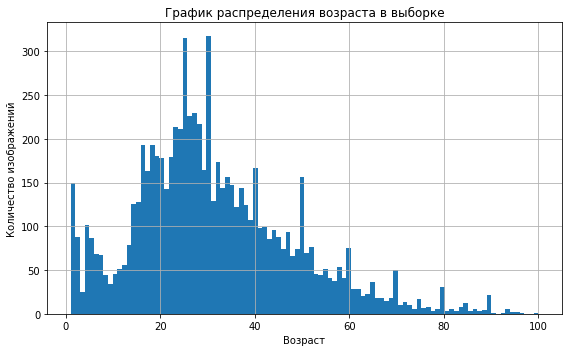

In [9]:
plt.figure(figsize=(8, 5))

labels['real_age'].plot.hist(bins=labels['real_age'].max(), grid=True)
plt.title('График распределения возраста в выборке', fontsize=TITLE_FONTSIZE)
plt.xlabel('Возраст')
plt.ylabel('Количество изображений')

plt.tight_layout()
plt.show()

### Визуальный обзор данных.

<b>Вывод на экран 15-ти случайных фотографий из датасета.</b>

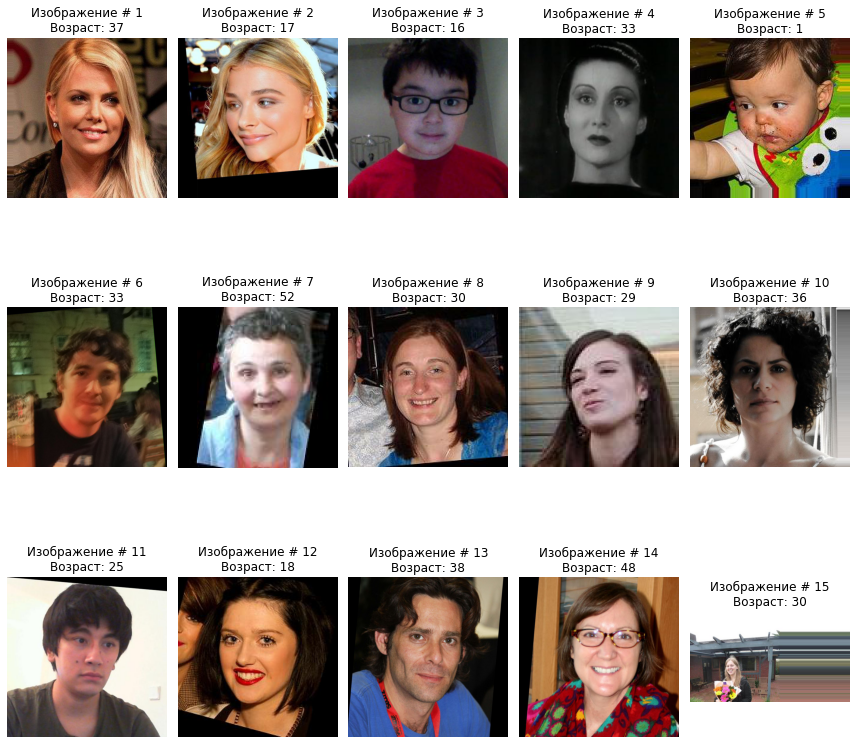

In [10]:
random_images = random.sample(labels['file_name'].tolist(), 15)

fig = plt.figure(figsize=(12, 12))

for i, image_filename in enumerate(random_images, start=1):
    image_path = os.path.join(IMAGES_PATH, image_filename)
    
    if not os.path.exists(image_path):
        print(f'Файл не найден: {image_path}')
        continue
    
    with Image.open(image_path) as img:
        real_age = labels[labels['file_name'] == image_filename]['real_age'].values[0]
        ax = fig.add_subplot(3, 5, i)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f'Изображение # {i}\nВозраст: {real_age}', fontsize=TITLE_FONTSIZE)

plt.tight_layout()
plt.show()

### Краткий вывод

<b>Исследовательский анализ данных</b>
1. Для проведения исследовательского анализа данных были использованы следующие библиотеки:
    - `matplotlib`
    - `os`
    - `pandas`
    - `random`
    - `PIL`
2. Было задано постоянное начальное значение генератора псевдослучайных чисел, равное $42$.
3. Общая информация о датасете с использованием метода `info()` показала $7,591$ ненулевых строк в столбцах `'file_name'` и `'real_age'` с соответствующими типами данных `'object'` и `'int64'`.
4. Метод `sample()` подтвердил, что датафрейм содержит данные о названиях файлов с изображениями и соответствующим им возрастом изображённого человека.
5. Описание данных через метод `describe()` указывает на то, что среднее значение возраста смещено от медианного значения и говорит о смещении распределения вправо.
    - Средний возраст: $31.2$ года
    - Минимальный возраст: $1$ год
    - Максимальный возраст: $100$ лет
6. Дубликатов и пропусков в датафрейме не обнаружено.
7. Анализ графика распределения возраста в выборке показывает наличие определенных выбросов, смещение вправо и логичный длинный хвост в район возраста $100$ лет.
8. Визуальный обзор 15-ти случайно выбранных фотографий говорит о достаточно хорошем разнообразии данных.
    - Изображения № 2, 6, 7, 8, 11, 12, 13 и 14 немного кадрированы.
    - Изображение № 4 является черно-белым и представляет даму из прошлого века, что не совсем соответствует задаче.
    - Изображение № 15 имеет не квадратную форму и большую часть изображения занимает фон.
9. Таким образом, можно считать датасет вполне пригодным для обучения модели, и ожидается достижение поставленных в техническом задании результатов.

## Обучение модели.

Обучение и тестирование проводилось на основе одной Tesla V100 SXM2 32 ГБ — профессиональной видеокарте от NVIDIA, выпущенной 27 марта 2018 года. Общее время обучения и тестирования составило 1 час 24 минуты.

### Архитектура модели и тип аугментации.

Архитектура модели:

- Входной слой: ResNet50
- Скрытый слой: GlobalAveragePooling2D
- Выходной слой: Dense
    - Функция активации: ReLU (Rectified Linear Unit),
    - Количество нейронов: 1

Загрузчик ImageDataGenerator использует аугментацию horizontal_flip.

### Обрабатываемая библиотека.

```python
import pandas as pd

from tensorflow import keras
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

RANDOM_STATE = 42

def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')

    datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1/255.,
        horizontal_flip=True,
        width_shift_range=0.15,
        height_shift_range=0.15,
        zoom_range=0.1
    )

    return datagen.flow_from_dataframe(
        dataframe = labels,
        directory = path+'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=RANDOM_STATE
    )


def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')

    datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1/255.)

    return datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path+'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=RANDOM_STATE
    )


def create_model(input_shape):
    backbone = ResNet50(
        weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
        input_shape=input_shape, 
        include_top=False
    )

    model = Sequential(
        [
            backbone, 
            GlobalAveragePooling2D(), 
            Dense(1, activation='relu')
        ]
    )
    
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='mean_squared_error',
        metrics=['mean_absolute_error']
    )
    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=50,
                steps_per_epoch=None, validation_steps=None):
    model.fit(
        train_data,
        validation_data=test_data,
        epochs=epochs, 
        batch_size=batch_size,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        verbose=2
    )
    return model

```

### Полученные результаты.

<pre>
Found 5694 validated image filenames.
Found 1897 validated image filenames.
<class 'tensorflow.python.keras.engine.sequential.Sequential'>
Train for 178 steps, validate for 60 steps
Epoch 1/50
178/178 - 122s - loss: 250.2543 - mean_absolute_error: 11.3345 - val_loss: 877.7962 - val_mean_absolute_error: 24.6528
Epoch 2/50
178/178 - 91s - loss: 93.1458 - mean_absolute_error: 7.2751 - val_loss: 300.9757 - val_mean_absolute_error: 13.3890
Epoch 3/50
178/178 - 92s - loss: 70.8464 - mean_absolute_error: 6.3765 - val_loss: 222.2839 - val_mean_absolute_error: 11.3272
Epoch 4/50
178/178 - 92s - loss: 59.0310 - mean_absolute_error: 5.8605 - val_loss: 127.5089 - val_mean_absolute_error: 8.4902
Epoch 5/50
178/178 - 91s - loss: 48.4507 - mean_absolute_error: 5.3243 - val_loss: 101.9010 - val_mean_absolute_error: 7.4696
Epoch 6/50
178/178 - 92s - loss: 42.0376 - mean_absolute_error: 4.9577 - val_loss: 67.6552 - val_mean_absolute_error: 6.0770
Epoch 7/50
178/178 - 92s - loss: 37.7781 - mean_absolute_error: 4.7057 - val_loss: 64.3877 - val_mean_absolute_error: 5.8901
Epoch 8/50
178/178 - 92s - loss: 32.1780 - mean_absolute_error: 4.3561 - val_loss: 76.7135 - val_mean_absolute_error: 6.3391
Epoch 9/50
178/178 - 91s - loss: 31.0291 - mean_absolute_error: 4.2543 - val_loss: 86.6261 - val_mean_absolute_error: 6.8084
Epoch 10/50
178/178 - 92s - loss: 26.3260 - mean_absolute_error: 3.9673 - val_loss: 70.6008 - val_mean_absolute_error: 6.0750
Epoch 11/50
178/178 - 92s - loss: 23.1666 - mean_absolute_error: 3.7218 - val_loss: 83.4248 - val_mean_absolute_error: 6.6479
Epoch 12/50
178/178 - 92s - loss: 21.5345 - mean_absolute_error: 3.5530 - val_loss: 74.8765 - val_mean_absolute_error: 6.2294
Epoch 13/50
178/178 - 91s - loss: 19.9525 - mean_absolute_error: 3.4621 - val_loss: 107.2934 - val_mean_absolute_error: 7.7768
Epoch 14/50
178/178 - 92s - loss: 18.5844 - mean_absolute_error: 3.3125 - val_loss: 67.9162 - val_mean_absolute_error: 6.0520
Epoch 15/50
178/178 - 92s - loss: 16.0742 - mean_absolute_error: 3.1067 - val_loss: 67.4634 - val_mean_absolute_error: 6.0001
Epoch 16/50
178/178 - 91s - loss: 14.8000 - mean_absolute_error: 2.9646 - val_loss: 72.5585 - val_mean_absolute_error: 6.1228
Epoch 17/50
178/178 - 92s - loss: 13.5164 - mean_absolute_error: 2.8167 - val_loss: 67.5151 - val_mean_absolute_error: 5.8879
Epoch 18/50
178/178 - 92s - loss: 13.0564 - mean_absolute_error: 2.7688 - val_loss: 68.7780 - val_mean_absolute_error: 5.9647
Epoch 19/50
178/178 - 91s - loss: 12.2966 - mean_absolute_error: 2.6710 - val_loss: 70.7459 - val_mean_absolute_error: 6.2432
Epoch 20/50
178/178 - 92s - loss: 12.0278 - mean_absolute_error: 2.6488 - val_loss: 65.0544 - val_mean_absolute_error: 5.9370
Epoch 21/50
178/178 - 92s - loss: 11.4496 - mean_absolute_error: 2.6053 - val_loss: 73.7377 - val_mean_absolute_error: 6.3671
Epoch 22/50
178/178 - 98s - loss: 11.4707 - mean_absolute_error: 2.6035 - val_loss: 66.0456 - val_mean_absolute_error: 5.8279
Epoch 23/50
178/178 - 98s - loss: 10.3091 - mean_absolute_error: 2.4852 - val_loss: 63.2197 - val_mean_absolute_error: 5.7292
Epoch 24/50
178/178 - 95s - loss: 10.5846 - mean_absolute_error: 2.4881 - val_loss: 66.1039 - val_mean_absolute_error: 6.0802
Epoch 25/50
178/178 - 97s - loss: 10.0592 - mean_absolute_error: 2.4685 - val_loss: 72.4635 - val_mean_absolute_error: 6.1810
Epoch 26/50
178/178 - 95s - loss: 11.4791 - mean_absolute_error: 2.5915 - val_loss: 71.5995 - val_mean_absolute_error: 6.0486
Epoch 27/50
178/178 - 94s - loss: 11.4430 - mean_absolute_error: 2.6058 - val_loss: 75.2559 - val_mean_absolute_error: 6.6932
Epoch 28/50
178/178 - 94s - loss: 17.7673 - mean_absolute_error: 3.0975 - val_loss: 106.3047 - val_mean_absolute_error: 7.4850
Epoch 29/50
178/178 - 95s - loss: 15.3501 - mean_absolute_error: 2.9779 - val_loss: 86.8232 - val_mean_absolute_error: 6.5149
Epoch 30/50
178/178 - 96s - loss: 10.6755 - mean_absolute_error: 2.5029 - val_loss: 78.2750 - val_mean_absolute_error: 6.7476
Epoch 31/50
178/178 - 94s - loss: 9.3206 - mean_absolute_error: 2.3218 - val_loss: 62.2645 - val_mean_absolute_error: 5.7553
Epoch 32/50
178/178 - 95s - loss: 8.1521 - mean_absolute_error: 2.1818 - val_loss: 62.6642 - val_mean_absolute_error: 5.6957
Epoch 33/50
178/178 - 97s - loss: 7.6105 - mean_absolute_error: 2.1191 - val_loss: 63.0014 - val_mean_absolute_error: 5.7502
Epoch 34/50
178/178 - 95s - loss: 7.0307 - mean_absolute_error: 2.0286 - val_loss: 61.4446 - val_mean_absolute_error: 5.5394
Epoch 35/50
178/178 - 96s - loss: 7.0999 - mean_absolute_error: 2.0210 - val_loss: 64.4076 - val_mean_absolute_error: 5.9278
Epoch 36/50
178/178 - 94s - loss: 7.7252 - mean_absolute_error: 2.1139 - val_loss: 71.3702 - val_mean_absolute_error: 6.0357
Epoch 37/50
178/178 - 95s - loss: 7.6749 - mean_absolute_error: 2.1240 - val_loss: 60.1644 - val_mean_absolute_error: 5.5730
Epoch 38/50
178/178 - 95s - loss: 19.6566 - mean_absolute_error: 3.2053 - val_loss: 114.9019 - val_mean_absolute_error: 7.9510
Epoch 39/50
178/178 - 95s - loss: 14.2320 - mean_absolute_error: 2.8824 - val_loss: 64.8386 - val_mean_absolute_error: 5.9371
Epoch 40/50
178/178 - 94s - loss: 9.2829 - mean_absolute_error: 2.3334 - val_loss: 64.5877 - val_mean_absolute_error: 5.8511
Epoch 41/50
178/178 - 91s - loss: 7.3329 - mean_absolute_error: 2.0747 - val_loss: 67.7682 - val_mean_absolute_error: 6.3022
Epoch 42/50
178/178 - 92s - loss: 7.3499 - mean_absolute_error: 2.0193 - val_loss: 61.7639 - val_mean_absolute_error: 5.5587
Epoch 43/50
178/178 - 93s - loss: 6.3989 - mean_absolute_error: 1.9224 - val_loss: 64.4464 - val_mean_absolute_error: 5.8459
Epoch 44/50
178/178 - 97s - loss: 5.9640 - mean_absolute_error: 1.8635 - val_loss: 58.1111 - val_mean_absolute_error: 5.5710
Epoch 45/50
178/178 - 95s - loss: 5.7607 - mean_absolute_error: 1.8175 - val_loss: 61.3698 - val_mean_absolute_error: 5.7357
Epoch 46/50
178/178 - 95s - loss: 5.7502 - mean_absolute_error: 1.8328 - val_loss: 58.5961 - val_mean_absolute_error: 5.5262
Epoch 47/50
178/178 - 92s - loss: 5.6230 - mean_absolute_error: 1.8114 - val_loss: 62.5092 - val_mean_absolute_error: 5.6332
Epoch 48/50
178/178 - 95s - loss: 6.7840 - mean_absolute_error: 1.9807 - val_loss: 58.0441 - val_mean_absolute_error: 5.5972
Epoch 49/50
178/178 - 96s - loss: 6.6288 - mean_absolute_error: 1.9527 - val_loss: 64.6183 - val_mean_absolute_error: 5.9185
Epoch 50/50
178/178 - 96s - loss: 6.0096 - mean_absolute_error: 1.8738 - val_loss: 56.4658 - val_mean_absolute_error: 5.3839
60/60 - 10s - loss: 56.4658 - mean_absolute_error: 5.3839
<b>Test MAE: 5.3839</b>

## Анализ обученной модели.

Модель нейронной сети, используемая в рамках данного проекта, представляет собой архитектуру, состоящую из  двух готовых решений и конечного Dense слоя. Используемые готовые решения:
- ResNet-50 (Residual Network с 50 слоями) — это глубокая нейронная сеть. Архитектура ResNet-50 включает в себя 50 слоев, в том числе сверточные, пулинг, и полносвязные слои, с применением функций активации ReLU.
- Global Average Pooling 2D. Эта операция используется перед полносвязными слоями, чтобы уменьшить размерность данных перед финальными предсказаниями.

<b>Архитектура модели.</b>

Модель состоит из нескольких уровней:

1. Входной слой:
    - ResNet-50.
2. Скрытый слой:
    - Global Average Pooling 2D.
3. Выходной слой (регрессия):
    - Dense(1, activation='relu').

<b>Оценка производительности.</b>

Модель была обучена на наборе данных APPA-REAL (real and apparent age) с применением горизонтальной аугментации. Её производительность была оценена с использованием метрики MAE (Mean Absolute Error). В результате тестирования достигнута точность предсказаний равная $5.3839$ (примерно $5$ лет и $4$ месяца), что свидетельствует об удовлетворении требованиям технического задания.

Таким образом, модель может использоваться для анализа покупок и предлагать (в рамках соответствующего программного комплекса) товары, которые могут заинтересовать покупателей этой возрастной группы, но её использование для контроля добросовестности кассиров при продаже алкоголя педставляется весьма вариантным.

<b>Улучшения и перспективы.</b>

Возможные улучшения модели включают в себя дополнительный тюнинг гиперпараметров, увеличение размерности сети, например использование ResNet-101 или ResNet-152 или применение других, более сложных архитектур нейронных сетей. Кроме того, можно рассмотреть другие способы аугментации данных для улучшения обобщающей способности модели.

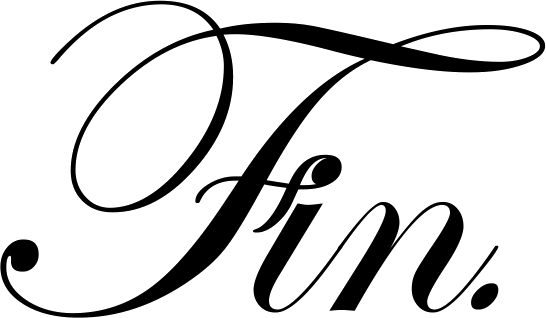